# Sales Analysis of Australian Company : AAL #

# 1. Data Loading #

In [66]:
import pandas as pd

Loading 4th quarter Data 

In [67]:
df = pd.read_csv("./datastore/AusApparalSales4thQrt2020.csv")
df.head()

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


In [69]:
df.isna()

,Date,Time,State,Group,Unit,Sales
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
7555,False,False,False,False,False,False
7556,False,False,False,False,False,False
7557,False,False,False,False,False,False
7558,False,False,False,False,False,False


In [70]:
df.notna()

,Date,Time,State,Group,Unit,Sales
0,True,True,True,True,True,True
1,True,True,True,True,True,True
2,True,True,True,True,True,True
3,True,True,True,True,True,True
4,True,True,True,True,True,True
...,...,...,...,...,...,...
7555,True,True,True,True,True,True
7556,True,True,True,True,True,True
7557,True,True,True,True,True,True
7558,True,True,True,True,True,True


In [71]:
df.describe()

,Unit,Sales
count,7560.000000,7560.000000
mean,18.005423,45013.558201
std,12.901403,32253.506944
min,2.000000,5000.000000
25%,8.000000,20000.000000
50%,14.000000,35000.000000
75%,26.000000,65000.000000
max,65.000000,162500.000000


# 2. Data Wrangling #

## 2.1 Check for missing values ##

In [72]:
missing_value = df.isnull().sum()
print("Missing Value per Column :")
print(missing_value)

Missing Value per Column :
Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64


As per data output it seems that there is no missing values in dataset

## 2.2 Check for Duplicates ##

In [73]:
print(df.shape)

(7560, 6)


In [74]:
df.head()

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500


In [75]:
df_no_of_duplicates = df.drop_duplicates()
print(df_no_of_duplicates.shape)

(7560, 6)


Result of data shape in df and df_no_of_duplicates are same. This means that there is not duplicate data present

## 2.3 Data Cleaning ##
### Check for Data format and reshaping them into proper Data Type ###
#### Data Before Cleaning ####

In [76]:
df.head()

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500


In [77]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


Current Date is of Type Object. We need to convert it into Date time format only then we can perform dates relate operations.

In [78]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    7560 non-null   datetime64[ns]
 1   Time    7560 non-null   object        
 2   State   7560 non-null   object        
 3   Group   7560 non-null   object        
 4   Unit    7560 non-null   int64         
 5   Sales   7560 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 354.5+ KB


In [79]:
df.head()

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,8,20000
1,2020-10-01,Morning,WA,Men,8,20000
2,2020-10-01,Morning,WA,Women,4,10000
3,2020-10-01,Morning,WA,Seniors,15,37500
4,2020-10-01,Afternoon,WA,Kids,3,7500


## 2.4 Data Cleaning ##

### Need to know unit sale price ###

In [80]:
import numpy as np

In [81]:
if 'Sales' in df.columns:
    df['per_unit_price'] = df['Sales'] / df['Unit']

In [82]:
df.tail()

,Date,Time,State,Group,Unit,Sales,per_unit_price
7555,2020-12-30,Afternoon,TAS,Seniors,14,35000,2500.0
7556,2020-12-30,Evening,TAS,Kids,15,37500,2500.0
7557,2020-12-30,Evening,TAS,Men,15,37500,2500.0
7558,2020-12-30,Evening,TAS,Women,11,27500,2500.0
7559,2020-12-30,Evening,TAS,Seniors,13,32500,2500.0


 As Unit and Sales are in different range of numbers so we need to normalize them with in the range of 0 ~ 1

In [83]:
df['norm_unit'] = (df['Unit'] - df['Unit'].min()) / (df['Unit'].max() - df['Unit'].min())
df['norm_sales'] = (df['Sales'] - df['Sales'].min()) / (df['Sales'].max() - df['Sales'].min())
df.head()

,Date,Time,State,Group,Unit,Sales,per_unit_price,norm_unit,norm_sales
0,2020-10-01,Morning,WA,Kids,8,20000,2500.0,0.095238,0.095238
1,2020-10-01,Morning,WA,Men,8,20000,2500.0,0.095238,0.095238
2,2020-10-01,Morning,WA,Women,4,10000,2500.0,0.031746,0.031746
3,2020-10-01,Morning,WA,Seniors,15,37500,2500.0,0.206349,0.206349
4,2020-10-01,Afternoon,WA,Kids,3,7500,2500.0,0.015873,0.015873


In [84]:
print(df['Sales'].max())


162500


In [85]:
print(df['Sales'].min())

5000


## 2.5 Aggregation of Data ##

Group by on the basis of State

Sales Aggregation Data group wise

In [86]:
df_agg_state_sales = df.groupby('Group').agg({
    'Sales' : ['mean', 'median', 'min', 'max', 'sum', 'std', 'var', 'count']
})
#df_agg_state.head()
df_agg_state_sales

Sales                                                 \
                 mean   median   min     max       sum           std   
Group                                                                  
Kids     45011.904762  35000.0  5000  162500  85072500  31871.491085   
Men      45370.370370  35000.0  5000  160000  85750000  32177.180712   
Seniors  44464.285714  35000.0  5000  162500  84037500  32195.360017   
Women    45207.671958  35000.0  5000  162500  85442500  32781.639869   

                             
                  var count  
Group                        
Kids     1.015792e+09  1890  
Men      1.035371e+09  1890  
Seniors  1.036541e+09  1890  
Women    1.074636e+09  1890

Unit Aggregation Data state wise

In [87]:
df_agg_state_unit = df.groupby('State').agg({
    'Unit' : ['mean', 'median', 'min', 'max', 'sum', 'std', 'var', 'count']
})
#df_agg_state.head()
df_agg_state_unit

Unit                                                   
            mean median min max    sum        std         var count
State                                                              
NSW    27.766667   28.0  12  45  29988   8.250661   68.073401  1080
NT      8.362963    8.0   2  15   9032   3.584763   12.850527  1080
QLD    12.376852   12.0   3  25  13367   5.337855   28.492698  1080
SA     21.799074   21.0  10  35  23543   6.984386   48.781649  1080
TAS     8.429630    8.0   2  15   9104   3.609874   13.031188  1080
VIC    39.098148   38.0  20  65  42226  10.648639  113.393509  1080
WA      8.204630    8.0   2  15   8861   3.692762   13.636494  1080

In [88]:
df.head() 

,Date,Time,State,Group,Unit,Sales,per_unit_price,norm_unit,norm_sales
0,2020-10-01,Morning,WA,Kids,8,20000,2500.0,0.095238,0.095238
1,2020-10-01,Morning,WA,Men,8,20000,2500.0,0.095238,0.095238
2,2020-10-01,Morning,WA,Women,4,10000,2500.0,0.031746,0.031746
3,2020-10-01,Morning,WA,Seniors,15,37500,2500.0,0.206349,0.206349
4,2020-10-01,Afternoon,WA,Kids,3,7500,2500.0,0.015873,0.015873


## 2.6 Showing Weekly Distribution of Data ##

In [89]:
df['month'] = df['Date'].dt.month

In [90]:
df.tail()

,Date,Time,State,Group,Unit,Sales,per_unit_price,norm_unit,norm_sales,month
7555,2020-12-30,Afternoon,TAS,Seniors,14,35000,2500.0,0.190476,0.190476,12
7556,2020-12-30,Evening,TAS,Kids,15,37500,2500.0,0.206349,0.206349,12
7557,2020-12-30,Evening,TAS,Men,15,37500,2500.0,0.206349,0.206349,12
7558,2020-12-30,Evening,TAS,Women,11,27500,2500.0,0.142857,0.142857,12
7559,2020-12-30,Evening,TAS,Seniors,13,32500,2500.0,0.174603,0.174603,12


Date operation: Added Month fields 

In [91]:
df.loc[df["month"] == 10, "month"] = "OCT"
df.loc[df["month"] == 11, "month"] = "NOV"
df.loc[df["month"] == 12, "month"] = "DEC"
df.head()

/tmp/ipykernel_6076/181559792.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'OCT' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.loc[df["month"] == 10, "month"] = "OCT"


,Date,Time,State,Group,Unit,Sales,per_unit_price,norm_unit,norm_sales,month
0,2020-10-01,Morning,WA,Kids,8,20000,2500.0,0.095238,0.095238,OCT
1,2020-10-01,Morning,WA,Men,8,20000,2500.0,0.095238,0.095238,OCT
2,2020-10-01,Morning,WA,Women,4,10000,2500.0,0.031746,0.031746,OCT
3,2020-10-01,Morning,WA,Seniors,15,37500,2500.0,0.206349,0.206349,OCT
4,2020-10-01,Afternoon,WA,Kids,3,7500,2500.0,0.015873,0.015873,OCT


In [92]:
df['week'] = df['Date'].map(lambda x : x.isocalendar()[1])
df

,Date,Time,State,Group,Unit,Sales,per_unit_price,norm_unit,norm_sales,month,week
0,2020-10-01,Morning,WA,Kids,8,20000,2500.0,0.095238,0.095238,OCT,40
1,2020-10-01,Morning,WA,Men,8,20000,2500.0,0.095238,0.095238,OCT,40
2,2020-10-01,Morning,WA,Women,4,10000,2500.0,0.031746,0.031746,OCT,40
3,2020-10-01,Morning,WA,Seniors,15,37500,2500.0,0.206349,0.206349,OCT,40
4,2020-10-01,Afternoon,WA,Kids,3,7500,2500.0,0.015873,0.015873,OCT,40
...,...,...,...,...,...,...,...,...,...,...,...
7555,2020-12-30,Afternoon,TAS,Seniors,14,35000,2500.0,0.190476,0.190476,DEC,53
7556,2020-12-30,Evening,TAS,Kids,15,37500,2500.0,0.206349,0.206349,DEC,53
7557,2020-12-30,Evening,TAS,Men,15,37500,2500.0,0.206349,0.206349,DEC,53
7558,2020-12-30,Evening,TAS,Women,11,27500,2500.0,0.142857,0.142857,DEC,53


### Below Data shows - Sales of items group wise across each state. It consist of Min sales , Max, Sales, Total sale, ###

In [93]:
df_agg_week_unit = df.groupby(['Group' , 'State']).agg({
    'Sales' : ['mean','min', 'max', 'sum']
}) 
#df_agg_state.head()
df_agg_week_unit.all

<bound method DataFrame.all of                       Sales                         
                       mean    min     max       sum
Group   State                                       
Kids    NSW    68842.592593  30000  112500  18587500
        NT     21111.111111   5000   37500   5700000
        QLD    31518.518519   7500   62500   8510000
        SA     53759.259259  25000   87500  14515000
        TAS    21388.888889   5000   37500   5775000
        VIC    97629.629630  50000  162500  26360000
        WA     20833.333333   5000   37500   5625000
Men     NSW    70453.703704  30000  112500  19022500
        NT     21342.592593   5000   37500   5762500
        QLD    31083.333333   7500   62500   8392500
        SA     54277.777778  25000   87500  14655000
        TAS    21324.074074   5000   37500   5757500
        VIC    97805.555556  50000  160000  26407500
        WA     21305.555556   5000   37500   5752500
Seniors NSW    67361.111111  30000  112500  18187500
        NT     

In [94]:
df_pivoted_group_state = df.pivot_table(index='Group', columns='State', values='Sales', aggfunc='sum')
#df_pivoted = df_pivoted.drop('All')
print(df_pivoted_group_state)

State         NSW       NT      QLD        SA      TAS       VIC       WA
Group                                                                    
Kids     18587500  5700000  8510000  14515000  5775000  26360000  5625000
Men      19022500  5762500  8392500  14655000  5757500  26407500  5752500
Seniors  18187500  5465000  8190000  14717500  5650000  26315000  5512500
Women    19172500  5652500  8325000  14970000  5577500  26482500  5262500


# Data Visualization #

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

1. State wise sales analysis for different demographic groups (kids, women, men, seniors)

In [96]:
df.head()

,Date,Time,State,Group,Unit,Sales,per_unit_price,norm_unit,norm_sales,month,week
0,2020-10-01,Morning,WA,Kids,8,20000,2500.0,0.095238,0.095238,OCT,40
1,2020-10-01,Morning,WA,Men,8,20000,2500.0,0.095238,0.095238,OCT,40
2,2020-10-01,Morning,WA,Women,4,10000,2500.0,0.031746,0.031746,OCT,40
3,2020-10-01,Morning,WA,Seniors,15,37500,2500.0,0.206349,0.206349,OCT,40
4,2020-10-01,Afternoon,WA,Kids,3,7500,2500.0,0.015873,0.015873,OCT,40


In [97]:
df_pivoted_group_state

State,NSW,NT,QLD,SA,TAS,VIC,WA
Group,,,,,,,
Kids,18587500,5700000,8510000,14515000,5775000,26360000,5625000
Men,19022500,5762500,8392500,14655000,5757500,26407500,5752500
Seniors,18187500,5465000,8190000,14717500,5650000,26315000,5512500
Women,19172500,5652500,8325000,14970000,5577500,26482500,5262500


1. State Wise Sales analysis 

In [98]:
df.head()

,Date,Time,State,Group,Unit,Sales,per_unit_price,norm_unit,norm_sales,month,week
0,2020-10-01,Morning,WA,Kids,8,20000,2500.0,0.095238,0.095238,OCT,40
1,2020-10-01,Morning,WA,Men,8,20000,2500.0,0.095238,0.095238,OCT,40
2,2020-10-01,Morning,WA,Women,4,10000,2500.0,0.031746,0.031746,OCT,40
3,2020-10-01,Morning,WA,Seniors,15,37500,2500.0,0.206349,0.206349,OCT,40
4,2020-10-01,Afternoon,WA,Kids,3,7500,2500.0,0.015873,0.015873,OCT,40


In [99]:
df_pivot_statewise = df.pivot_table(index=['State', 'Group'], values='Sales', aggfunc='sum')
print(df_pivot_statewise)

                  Sales
State Group            
NSW   Kids     18587500
      Men      19022500
      Seniors  18187500
      Women    19172500
NT    Kids      5700000
      Men       5762500
      Seniors   5465000
      Women     5652500
QLD   Kids      8510000
      Men       8392500
      Seniors   8190000
      Women     8325000
SA    Kids     14515000
      Men      14655000
      Seniors  14717500
      Women    14970000
TAS   Kids      5775000
      Men       5757500
      Seniors   5650000
      Women     5577500
VIC   Kids     26360000
      Men      26407500
      Seniors  26315000
      Women    26482500
WA    Kids      5625000
      Men       5752500
      Seniors   5512500
      Women     5262500


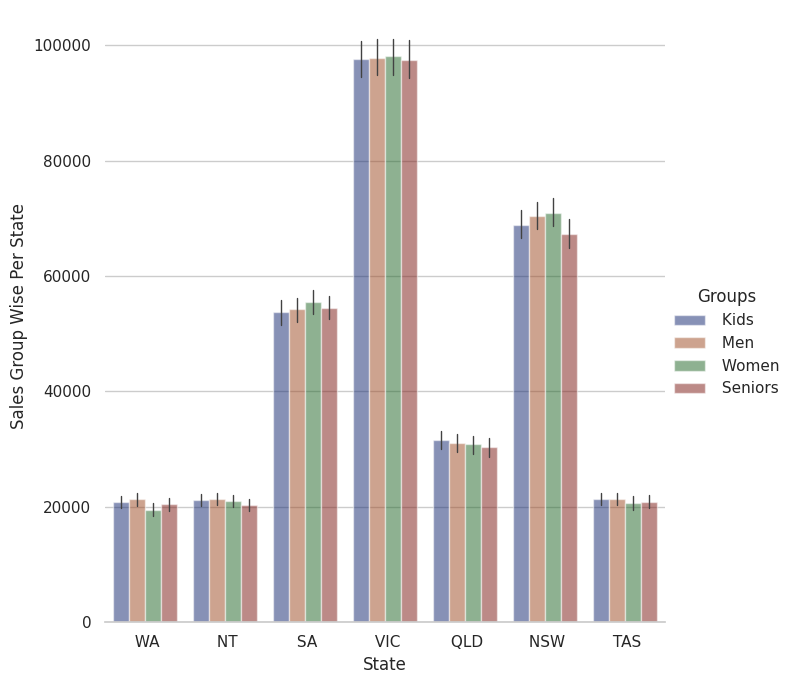

In [100]:
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=df, kind="bar",
    x="State", y="Sales", hue="Group",
    palette="dark", err_kws={'linewidth': 1}, alpha=.5, height=7, legend=True
)
g.despine(left=True)
g.set_axis_labels("State", "Sales Group Wise Per State")
g.legend.set_title("Groups")


2. Group wise sales analysis (Kids, Women, Men, Seniors) across various states

In [101]:
df_pivot_group_wise  = df.pivot_table(index=['Group', 'State'], values='Sales', aggfunc='sum')
print(df_pivot_group_wise)

                  Sales
Group   State          
Kids    NSW    18587500
        NT      5700000
        QLD     8510000
        SA     14515000
        TAS     5775000
        VIC    26360000
        WA      5625000
Men     NSW    19022500
        NT      5762500
        QLD     8392500
        SA     14655000
        TAS     5757500
        VIC    26407500
        WA      5752500
Seniors NSW    18187500
        NT      5465000
        QLD     8190000
        SA     14717500
        TAS     5650000
        VIC    26315000
        WA      5512500
Women   NSW    19172500
        NT      5652500
        QLD     8325000
        SA     14970000
        TAS     5577500
        VIC    26482500
        WA      5262500


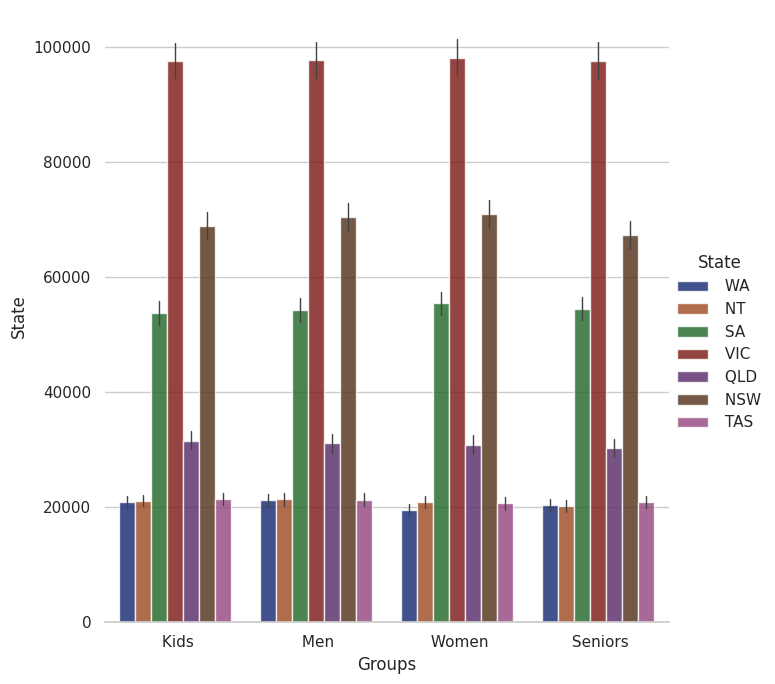

In [102]:
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=df, kind="bar",
    x="Group", y="Sales", hue="State",
    palette="dark", err_kws={'linewidth': 1}, alpha=.8, height=7, legend=True
)
g.despine(left=True)
g.set_axis_labels("Groups", "State")

g.legend.set_title("State")


3. Time of the Day analysis - identify peak and off peak sales periods

In [103]:
# df.head()
# for month in df['month']:
#     print(month)
#     if month == 10:
#         df['month'] = 'Oct'
#         continue
#     elif month ==11:
#         df['month'] = 'Nov'
#         continue
#     else:
#         df['month'] = 'Dec'
#         continue
df.head()

,Date,Time,State,Group,Unit,Sales,per_unit_price,norm_unit,norm_sales,month,week
0,2020-10-01,Morning,WA,Kids,8,20000,2500.0,0.095238,0.095238,OCT,40
1,2020-10-01,Morning,WA,Men,8,20000,2500.0,0.095238,0.095238,OCT,40
2,2020-10-01,Morning,WA,Women,4,10000,2500.0,0.031746,0.031746,OCT,40
3,2020-10-01,Morning,WA,Seniors,15,37500,2500.0,0.206349,0.206349,OCT,40
4,2020-10-01,Afternoon,WA,Kids,3,7500,2500.0,0.015873,0.015873,OCT,40


In [104]:
df_pivoted_week_min = df.pivot_table(index=["week"], values=["Sales"], aggfunc= 'min')
print(df_pivoted_week_min)

      Sales
week       
40     7500
41     7500
42     7500
43     7500
44     5000
45     5000
46     5000
47     5000
48     5000
49     5000
50    12500
51    12500
52    12500
53    12500


In [105]:
df_pivoted_week_max = df.pivot_table(index=["week"], values=["Sales"], aggfunc= 'max')
print(df_pivoted_week_max)

       Sales
week        
40    125000
41    125000
42    125000
43    125000
44    125000
45    112500
46    112500
47    112500
48    112500
49    162500
50    162500
51    162500
52    162500
53    162500


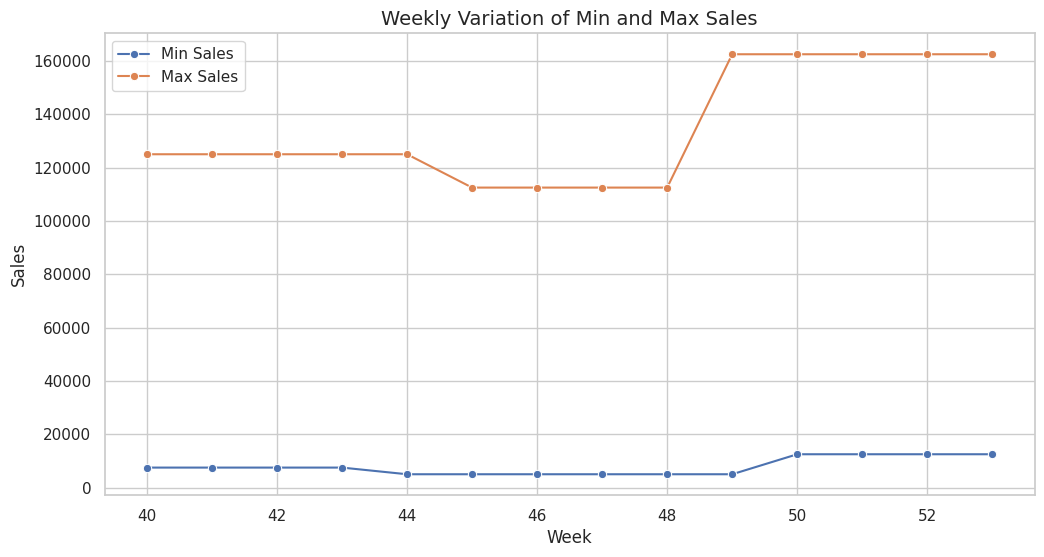

In [106]:
# Line plot for weekly variation of Min and Max Sales
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_pivoted_week_min, x='week', y=df_pivoted_week_min['Sales'], marker='o', label='Min Sales')
sns.lineplot(data=df_pivoted_week_max, x='week', y=df_pivoted_week_max['Sales'], marker='o', label='Max Sales')
plt.title('Weekly Variation of Min and Max Sales', fontsize=14)
plt.ylabel('Sales')
plt.xlabel('Week')
plt.legend()
plt.show()

In [107]:
df.head()

,Date,Time,State,Group,Unit,Sales,per_unit_price,norm_unit,norm_sales,month,week
0,2020-10-01,Morning,WA,Kids,8,20000,2500.0,0.095238,0.095238,OCT,40
1,2020-10-01,Morning,WA,Men,8,20000,2500.0,0.095238,0.095238,OCT,40
2,2020-10-01,Morning,WA,Women,4,10000,2500.0,0.031746,0.031746,OCT,40
3,2020-10-01,Morning,WA,Seniors,15,37500,2500.0,0.206349,0.206349,OCT,40
4,2020-10-01,Afternoon,WA,Kids,3,7500,2500.0,0.015873,0.015873,OCT,40


In [108]:
df_pivoted_time_min = df.pivot_table(index=['week', 'Time'], values='Sales', aggfunc= 'max')
df_pivoted_time_min

Sales
week Time             
40   Afternoon  117500
     Evening    125000
     Morning    125000
41   Afternoon  125000
     Evening    122500
     Morning    125000
42   Afternoon  125000
     Evening    125000
     Morning    125000
43   Afternoon  115000
     Evening    125000
     Morning    122500
44   Afternoon  125000
     Evening    125000
     Morning    125000
45   Afternoon  112500
     Evening    105000
     Morning    112500
46   Afternoon  112500
     Evening    112500
     Morning    110000
47   Afternoon  110000
     Evening    112500
     Morning    112500
48   Afternoon  105000
     Evening    110000
     Morning    112500
49   Afternoon  157500
     Evening    162500
     Morning    157500
50   Afternoon  157500
     Evening    162500
     Morning    160000
51   Afternoon  162500
     Evening    162500
     Morning    160000
52   Afternoon  162500
     Evening    162500
     Morning    160000
53   Afternoon  162500
     Evening    162500
     Morning    162500

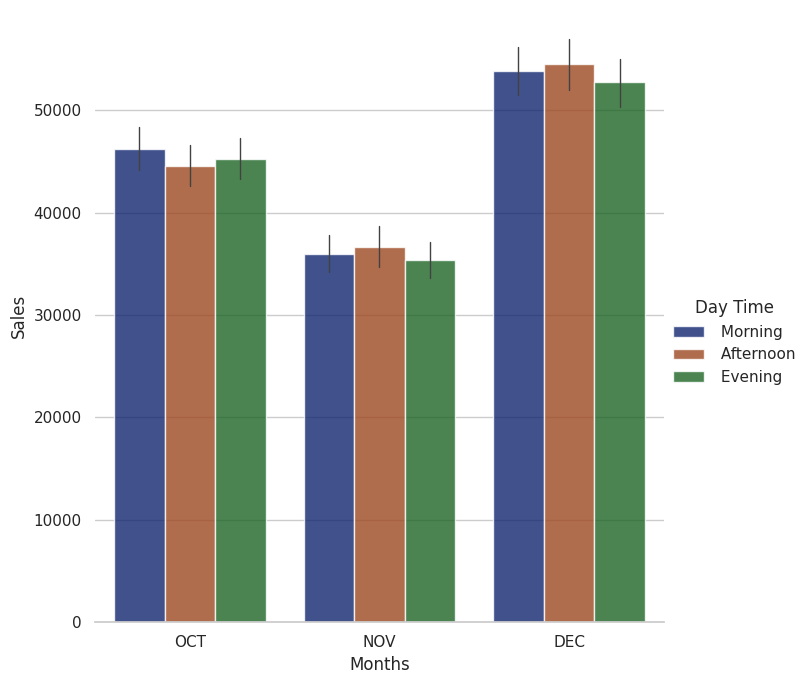

In [109]:
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=df, kind="bar",
    x="month", y="Sales", hue="Time",
    palette="dark", err_kws={'linewidth': 1}, alpha=.8, height=7, legend=True
)
g.despine(left=True)
g.set_axis_labels("Months", "Sales")

g.legend.set_title("Day Time")